In [1]:
%matplotlib inline
import os
import sys
import inspect
import matplotlib.pyplot as plt
import PIL

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from autocrop import Cropper

loc = 'data/macbeth.jpg'
c = Cropper()

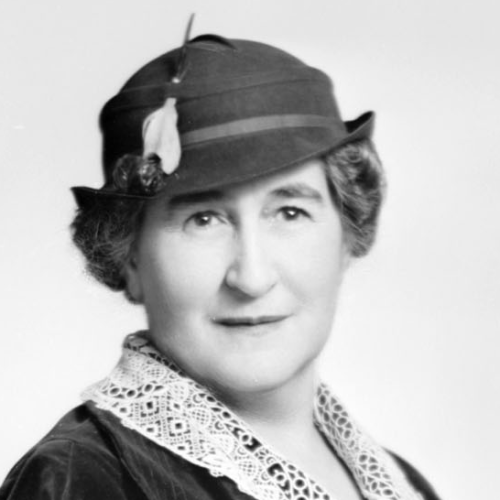

In [2]:
img_array = c.crop(loc)
PIL.Image.fromarray(img_array)

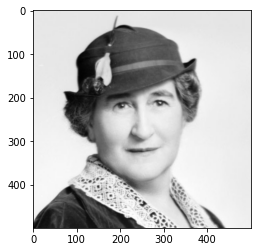

In [4]:
c = Cropper()
img_array = c.crop(loc)
plt.imshow(img_array)
plt.show()

In [5]:
%%timeit
# 32ms on 2016 i7 5-series, 148ms on 10 yo MBP
img_array = c.crop(loc)

37.1 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


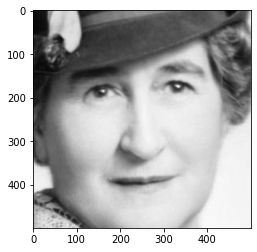

In [6]:
c = Cropper(face_percent=100)
plt.imshow(c.crop(loc))

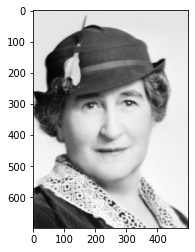

In [7]:
c = Cropper(height=700)
plt.imshow(c.crop(loc))

In [8]:
noise = 'data/noise.png'
assert c.crop(noise) is None

In [9]:
from glob import glob
faces = [f for f in glob('data/*') if not f.endswith('md')]

In [10]:
print(img_array)

[[[230 230 230]
  [230 230 230]
  [230 230 230]
  ...
  [229 229 229]
  [229 229 229]
  [229 229 229]]

 [[231 231 231]
  [231 231 231]
  [231 231 231]
  ...
  [229 229 229]
  [229 229 229]
  [229 229 229]]

 [[231 231 231]
  [231 231 231]
  [231 231 231]
  ...
  [229 229 229]
  [229 229 229]
  [229 229 229]]

 ...

 [[ 14  14  14]
  [ 13  13  13]
  [ 11  11  11]
  ...
  [239 239 239]
  [239 239 239]
  [240 240 240]]

 [[ 14  14  14]
  [ 11  11  11]
  [  8   8   8]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[ 14  14  14]
  [ 12  12  12]
  [ 11  11  11]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]]


In [ ]:
def plot_test_images(faces, cropper):
    """Given a list on filepaths, crops and plots them."""
    for face in faces:
        try:
            img_array = c.crop(face)
        except (AttributeError, TypeError):
            pass
        if img_array is not None:
            plt.imshow(img_array)
            plt.show()

            
c = Cropper(width=650, height=500, face_percent=40)
plot_test_images(faces, c)

In [ ]:
c = Cropper(height=650, width=500, face_percent=40)
plot_test_images(faces, c)

## `_crop_postions`

In [13]:
c = Cropper()
crop_positions = c._crop_positions
print(help(crop_positions))
crop_positions(500, 500, 50, 50, 100, 100)

Help on method _crop_positions in module autocrop.autocrop:

_crop_positions(imgh, imgw, x, y, w, h) method of autocrop.autocrop.Cropper instance
    Retuns the coordinates of the crop position centered
    around the detected face with extra margins. Tries to
    honor `self.face_percent` if possible, else uses the
    largest margins that comply with required aspect ratio
    given by `self.height` and `self.width`.
    
    Parameters:
    -----------
    imgh: int
        Height (px) of the image to be cropped
    imgw: int
        Width (px) of the image to be cropped
    x: int
        Leftmost coordinates of the detected face
    y: int
        Bottom-most coordinates of the detected face
    w: int
        Width of the detected face
    h: int
        Height of the detected face

None


[0, 200, 0, 200]

In [14]:
faces

['data/king.jpg',
 'data/remba-gardner.gif',
 'data/smith.jpg',
 'data/mccormack.jpg',
 'data/duncan.jpg',
 'data/obama.jpg',
 'data/macbeth.jpg',
 'data/noise.png',
 'data/vezina.jpg',
 'data/kwong.png']